<a href="https://colab.research.google.com/github/wilsonfmjr/PPGEEC2321---REDES-NEURAIS-E-DEEP-LEARNING/blob/main/Questao_1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

#Geração dos dados

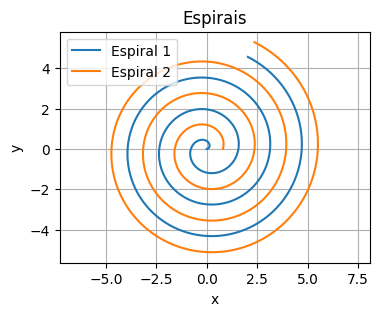

In [ ]:
N = 1000         # Define o tamanho do tensor

# Gera um vetor x [Nx1] de números aleatórios entre 0 e 20 radianos
theta = np.linspace(0, 20, N)

# Gera os dados da Espiral 1
x1 = (theta / 4) * np.cos(theta)
y1 = (theta / 4) * np.sin(theta)
spiral_1 = np.column_stack([x1, y1])

# Gera os dados da Espiral 2
x2 = (theta / 4 + 0.8) * np.cos(theta)
y2 = (theta / 4 + 0.8) * np.sin(theta)
spiral_2 = np.column_stack([x2, y2])

# Cria array de rótulos para as duas classes
label_1 = np.zeros(N)
label_2 = np.ones(N)

# Concatena os dados e os rótulos
X = np.concatenate([spiral_1, spiral_2])
y = np.concatenate([label_1, label_2])

# Plotando as duas funções
plt.figure(figsize=(4, 3))
plt.plot(x1, y1, label='Espiral 1')
plt.plot(x2, y2, label='Espiral 2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Espirais')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()

[texto do link](https://)# Data Preparation

#Partição do banco de dados

In [ ]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Cria modelos SVM

In [ ]:
# Modelo SVM com kernel linear
model_lin = SVC(kernel='linear', C = 100)

In [ ]:
# Modelo SVM com kernel polinomial
model_pol = SVC(kernel='poly', C = 100, degree=10)

In [ ]:
# Modelo SVM com kernel RBF
model_rbf = SVC(kernel='rbf', C = 100, gamma = 'auto')

#Treina modelos SVM

In [ ]:
# Treinar o modelo SVM linear
model_lin.fit(X_train, y_train)

SVC(C=100, kernel='linear')

In [ ]:
# Treinar o modelo SVM polinomial
model_pol.fit(X_train, y_train)

SVC(C=100, degree=10, kernel='poly')

In [ ]:
# Treinar o modelo SVM RBF
model_rbf.fit(X_train, y_train)

SVC(C=100, gamma='auto')

#Previsões dos modelos SVM

In [ ]:
# Fazer previsões
y_pred_lin = model_lin.predict(X_test)

In [ ]:
# Fazer previsões
y_pred_pol = model_pol.predict(X_test)

In [ ]:
# Fazer previsões
y_pred_rbf = model_rbf.predict(X_test)

#Acurácia dos modelos

In [ ]:
# Calcular a acurácia do modelos Linear
accuracy_lin = accuracy_score(y_test, y_pred_lin)
print(f'Acurácia SVM Linear: {accuracy_lin}')

# Calcular a acurácia do modelo polinomial
accuracy_pol = accuracy_score(y_test, y_pred_pol)
print(f'Acurácia SVM Polinomial: {accuracy_pol}')

# Calcular a acurácia domodelo RBF
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f'Acurácia SVM RBF: {accuracy_rbf}')

Acurácia SVM Linear: 0.58
Acurácia SVM Polinomial: 0.5725
Acurácia SVM RBF: 1.0


#Matriz de Confusão dos modelos

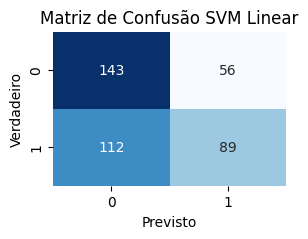

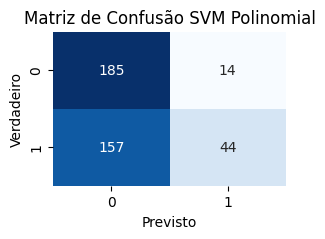

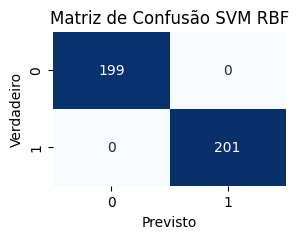

In [ ]:
# Gerar Matriz de Confusão
conf_matrix_lin = confusion_matrix(y_test, y_pred_lin)
plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix_lin, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão SVM Linear')
plt.show()

# Gerar Matriz de Confusão
conf_matrix_pol = confusion_matrix(y_test, y_pred_pol)
plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix_pol, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão SVM Polinomial')
plt.show()

# Gerar Matriz de Confusão
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)
plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix_rbf, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão SVM RBF')
plt.show()

#Fronteira de decisão

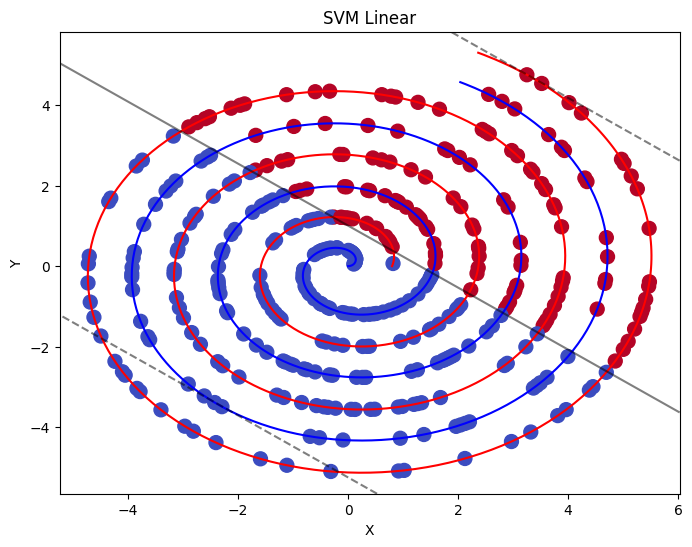

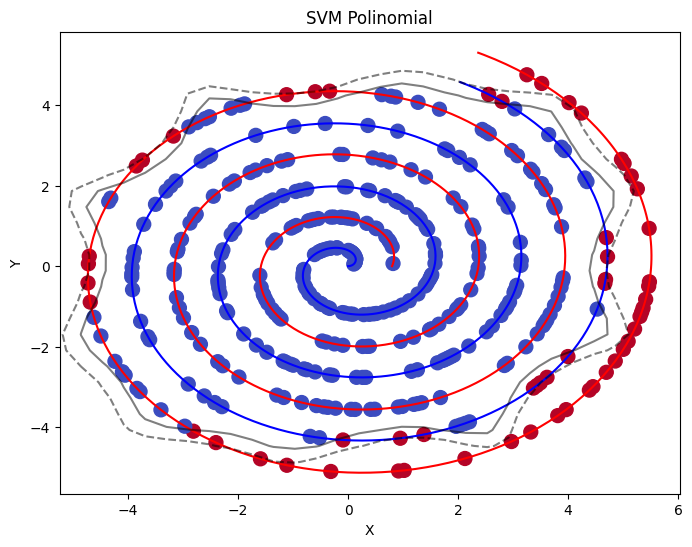

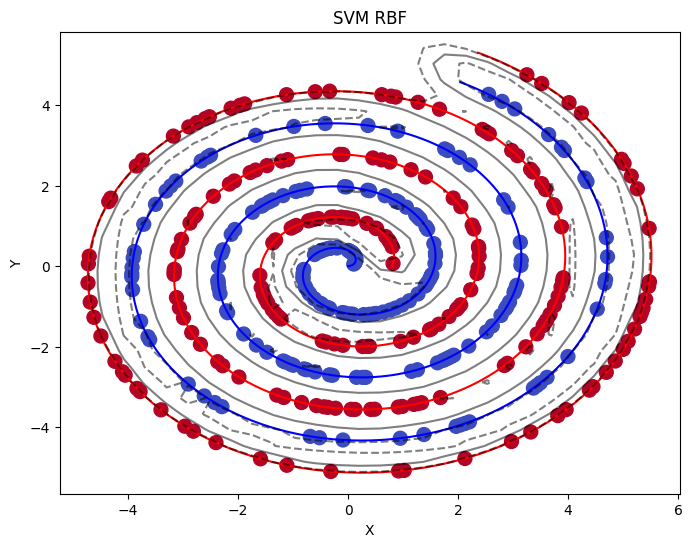

In [ ]:
# --------------- SVM Linear -------------------------

# Visualizar a fronteira de decisão
plt.figure(figsize=(8, 6))
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_lin, cmap=plt.cm.coolwarm, marker='o', s=100, label='Test')
plt.plot(x1, y1, label='Spiral 1', color='b')
plt.plot(x2, y2, label='Spiral 2', color='r')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.title('SVM Linear')
plt.xlabel('X')
plt.ylabel('Y')

# Criar grid para avaliar o modelo
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model_lin.decision_function(xy).reshape(XX.shape)

# Plotar a fronteira de decisão
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.show()

# --------------- SVM Polinomial -------------------------

# Visualizar a fronteira de decisão
plt.figure(figsize=(8, 6))
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_pol, cmap=plt.cm.coolwarm, marker='o', s=100, label='Test')
plt.plot(x1, y1, label='Spiral 1', color='b')
plt.plot(x2, y2, label='Spiral 2', color='r')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.title('SVM Polinomial')
plt.xlabel('X')
plt.ylabel('Y')

# Criar grid para avaliar o modelo
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model_pol.decision_function(xy).reshape(XX.shape)

# Plotar a fronteira de decisão
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.show()

# --------------- SVM RBF -------------------------

# Visualizar a fronteira de decisão
plt.figure(figsize=(8, 6))
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_rbf, cmap=plt.cm.coolwarm, marker='o', s=100, label='Test')
plt.plot(x1, y1, label='Spiral 1', color='b')
plt.plot(x2, y2, label='Spiral 2', color='r')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.title('SVM RBF')
plt.xlabel('X')
plt.ylabel('Y')

# Criar grid para avaliar o modelo
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model_rbf.decision_function(xy).reshape(XX.shape)

# Plotar a fronteira de decisão
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.show()